<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      200 non-null    object        
 1   CustomerID     200 non-null    object        
 2   Product        200 non-null    object        
 3   Category       200 non-null    object        
 4   Quantity       200 non-null    int64         
 5   Price          200 non-null    float64       
 6   Revenue        200 non-null    float64       
 7   PaymentMethod  200 non-null    object        
 8   Country        200 non-null    object        
 9   OrderDate      200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 15.8+ KB
Total Revenue: 30967748.14
Average Order Value: 52666.24
Total Customers: 49
Top 5 Products by Revenue:
Product
Headphones    5179238.11
Smartwatch    4826145.37
Smartphone    4530415.10
Tablet        

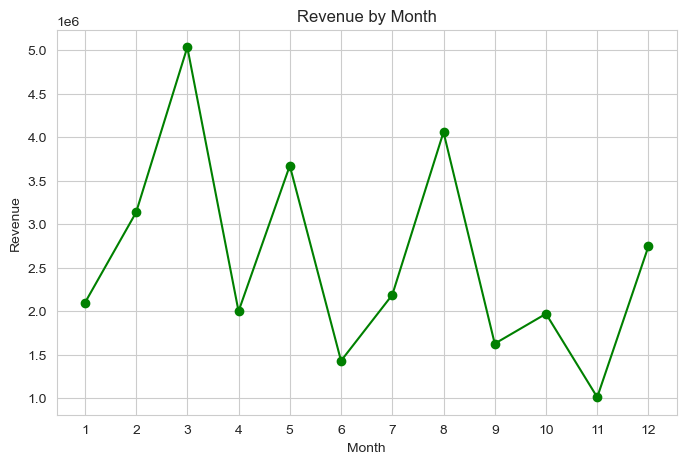

C:\Users\91620\AppData\Local\Temp\ipykernel_19604\4160517153.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=customer_count.index, y=customer_count.values, palette='Set2')


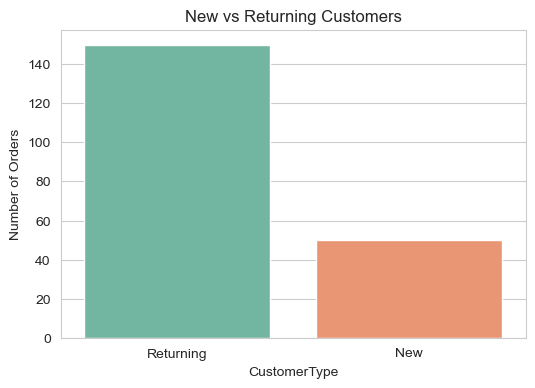

C:\Users\91620\AppData\Local\Temp\ipykernel_19604\4160517153.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette='Set3')


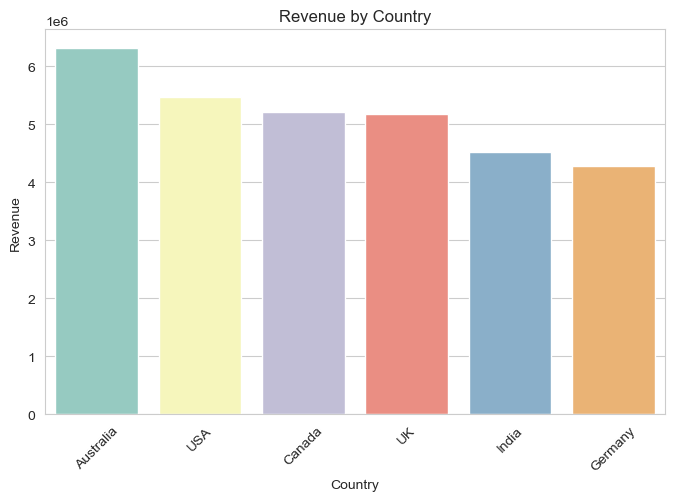

In [7]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = pd.read_csv("ecommerce_sample.csv")

df['OrderDate'] = pd.to_datetime(
    np.random.choice(pd.date_range("2023-01-01", "2023-12-31"), size=len(df)))

df.head()
df.info()
df = df.drop_duplicates()
df = df.dropna()
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df['Revenue'] = df['Quantity'] * df['Price']
df['Month'] = df['OrderDate'].dt.month
df['Weekday'] = df['OrderDate'].dt.day_name()
first_purchase = df.groupby('CustomerID')['OrderDate'].min().reset_index()
first_purchase.columns = ['CustomerID', 'FirstPurchaseDate']
df = df.merge(first_purchase, on='CustomerID', how='left')
df['CustomerType'] = df.apply(lambda x: 'New' if x['OrderDate']==x['FirstPurchaseDate'] else 'Returning', axis=1)

total_revenue = df['Revenue'].sum()
print("Total Revenue:", total_revenue)
avg_order_value = df['Revenue'].sum() / df['Quantity'].sum()
print("Average Order Value:", round(avg_order_value,2))
total_customers = df['CustomerID'].nunique()
print("Total Customers:", total_customers)

top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Products by Revenue:")
print(top_products)

sales_by_month = df.groupby('Month')['Revenue'].sum()
plt.figure(figsize=(8,5))
plt.plot(sales_by_month.index, sales_by_month.values, marker='o', color='green')
plt.title('Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(sales_by_month.index)
plt.show()

customer_count = df['CustomerType'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=customer_count.index, y=customer_count.values, palette='Set2')
plt.title('New vs Returning Customers')
plt.ylabel('Number of Orders')
plt.show()

country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=country_sales.index, y=country_sales.values, palette='Set3')
plt.title("Revenue by Country")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()



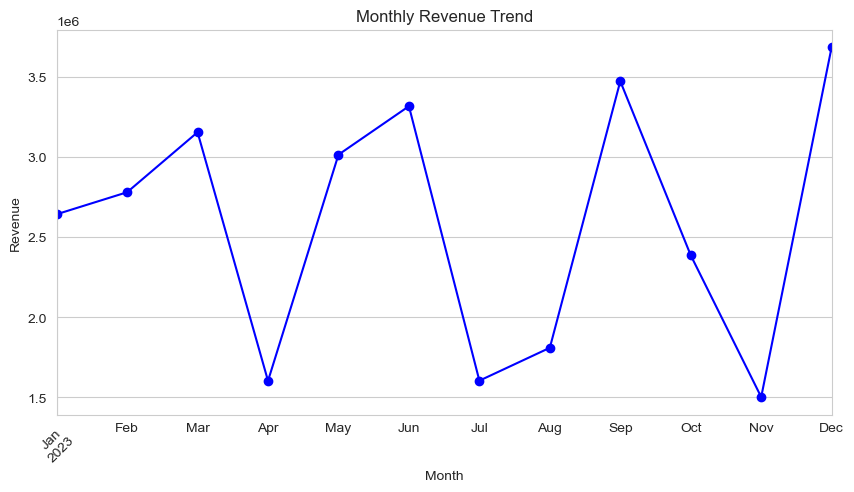

C:\Users\91620\AppData\Local\Temp\ipykernel_19604\2622617507.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


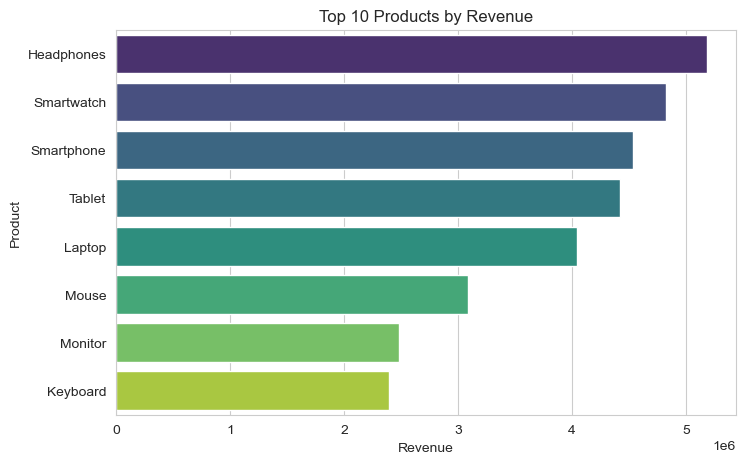

C:\Users\91620\AppData\Local\Temp\ipykernel_19604\2622617507.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="Set2")


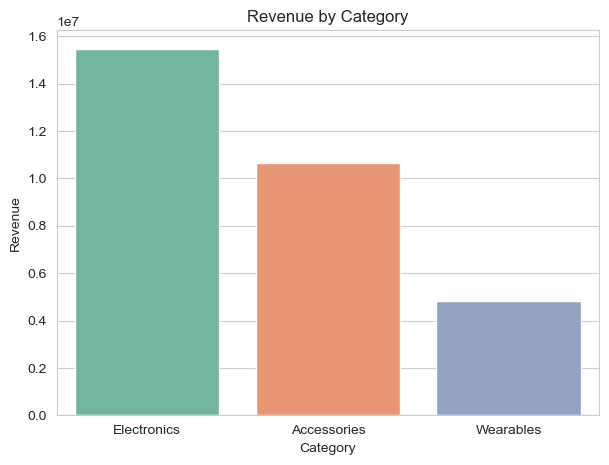

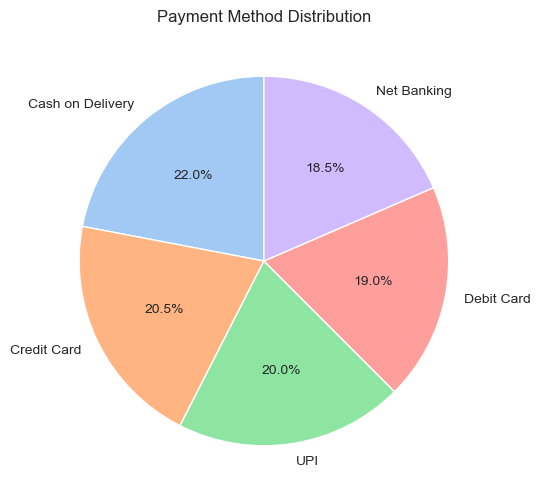

C:\Users\91620\AppData\Local\Temp\ipykernel_19604\2622617507.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_sales.index, y=country_sales.values, palette="Set3")


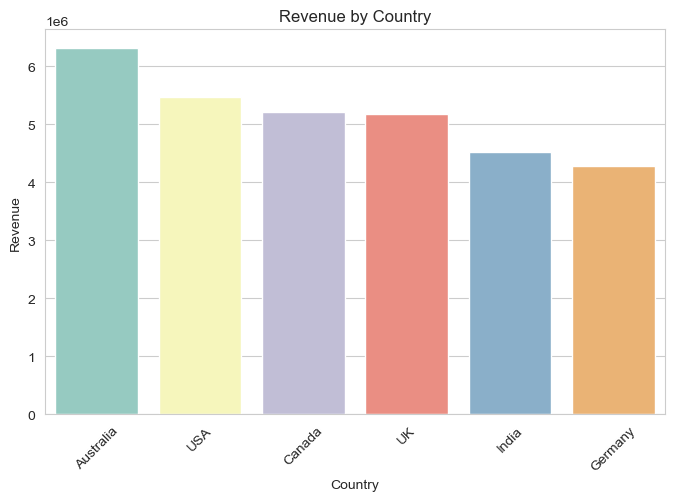

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("ecommerce_sample.csv")
if "OrderDate" not in df.columns:
    df['OrderDate'] = pd.to_datetime(
        np.random.choice(pd.date_range("2023-01-01", "2023-12-31"), size=len(df)))
df['Month'] = df['OrderDate'].dt.to_period('M')
monthly_revenue = df.groupby('Month')['Revenue'].sum()

plt.figure(figsize=(10,5))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Revenue Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.show()
top_products = df.groupby('Product')['Revenue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Product")
plt.show()
category_revenue = df.groupby('Category')['Revenue'].sum().sort_values(ascending=False)
plt.figure(figsize=(7,5))
sns.barplot(x=category_revenue.index, y=category_revenue.values, palette="Set2")
plt.title("Revenue by Category")
plt.ylabel("Revenue")
plt.xlabel("Category")
plt.show()

plt.figure(figsize=(6,6))
df['PaymentMethod'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Payment Method Distribution")
plt.ylabel("")
plt.show()

country_sales = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=country_sales.index, y=country_sales.values, palette="Set3")
plt.title("Revenue by Country")
plt.ylabel("Revenue")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()
